In [200]:
import pandas as pd
import  matplotlib.pyplot as plt
import datetime 
import numpy as np
import seaborn as sns
from datetime import datetime as dt

data = pd.read_csv('sales_data_dirty.csv')
data = data.drop_duplicates()
data.head()
data.isna().sum()
data.shape


(1000, 12)

In [201]:
# fill na
data.fillna({
             'Country':'Uknown',
             'Payment Method':'Uknown',
             'Returned':'Unknown',
             'Discount': data['Discount'].mean(),
             'Delivery Time': data['Delivery Time'].mean()
            }, inplace=True)
#pd.to_datetime(df['Order Date'],errors='coerce',format='%d')
data.info() # from here we now the dype is good
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          1000 non-null   object 
 1   Order Date        1000 non-null   object 
 2   Customer ID       895 non-null    object 
 3   Gender            854 non-null    object 
 4   Country           1000 non-null   object 
 5   Product Category  861 non-null    object 
 6   Quantity          1000 non-null   int64  
 7   Price             1000 non-null   float64
 8   Discount          1000 non-null   float64
 9   Payment Method    1000 non-null   object 
 10  Delivery Time     1000 non-null   float64
 11  Returned          1000 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 101.6+ KB


,Order ID,Order Date,Customer ID,Gender,Country,Product Category,Quantity,Price,Discount,Payment Method,Delivery Time,Returned
0,ORD1000,2022/02/08,CUST213,Female,France,Books,4,464.22,0.19,PayPal,12.0,Y
1,ORD1001,2023/02/03,CUST119,male,India,Home & Kitchen,8,35.12,0.01,creditcard,7.0,Yes
2,ORD1002,2023/07/04,CUST142,FEMALE,Uknown,Electronics,4,365.50,0.28,cash on delivery,8.0,Unknown
3,ORD1003,2023/02/23,NaN,Female,USA,Books,10,174.73,0.24,Credit Card,12.0,Yes
4,ORD1004,2022/04/24,CUST16,NaN,India,Sports,4,30.66,0.28,Cash on Delivery,15.0,N


In [202]:
# edit text
data['Gender']= data['Gender'].map(lambda x:'Male' if str(x).lower().startswith('m')
                                   else "Female" if  str(x).lower().startswith('f')
                                  else 'Unkown')
data['Payment Method'].unique()
data['Payment Method']= data['Payment Method'].map(lambda x:'Cash on Delivery' if x=='COD'
                                                else "Cash on Delivery" if  str(x).lower().endswith('y')
                                                else 'PayPal' if str(x).lower().endswith('l')
                                                else 'Credit Card' if str(x).lower().endswith('d')
                                                else 'Unkown')

data['Returned']= data['Returned'].map(lambda x:'Yes' if str(x).lower().startswith('y')
                                   else 'No' if  str(x).lower().startswith('n')
                                   else 'Unkown')
data.replace({'Product Category': {'Eletronics': 'Electronics'}}, inplace=True)

# Clean outliar
qes=(data['Price']).quantile([.25,.75])
iqr = qes[.75] - qes[.25]
outliear=data[(data['Price']<(qes[.25]-iqr)) | (data['Price']>(qes[.75]+iqr))]
data.loc[outliear.index,'Price']=data['Price'].mean()

qes=(data['Discount']).quantile([.25,.75])
iqr = qes[.75] - qes[.25]
dis_outliear=data[(data['Discount']<(qes[.25]-iqr)) | (data['Discount']>(qes[.75]+iqr))]
data.loc[dis_outliear.index,'Discount']=data['Discount'].mean() # here mean 1.7 is not much than 1.7  for that i replce 

qes=(data['Delivery Time']).quantile([.25,.75])
iqr = qes[.75] - qes[.25]
del_outliear=data[(data['Delivery Time']<(qes[.25]-iqr)) | (data['Delivery Time']>(qes[.75]+iqr))] # it dont have outliar
# edit format
data[['Price','Discount','Delivery Time']] = data[['Price','Discount','Delivery Time']].round(2)
data['Quantity']= data['Quantity'].abs()
data.tail(5)


,Order ID,Order Date,Customer ID,Gender,Country,Product Category,Quantity,Price,Discount,Payment Method,Delivery Time,Returned
995,ORD1995,2022/06/12,CUST25,Male,Germany,Electronics,8,427.32,0.23,Credit Card,2.0,Yes
996,ORD1996,2023/11/17,CUST141,Male,Germany,Sports,1,240.62,0.22,Cash on Delivery,9.0,Yes
997,ORD1997,2022/10/16,CUST280,Male,Uknown,Clothing,6,143.39,0.16,Cash on Delivery,8.0,Yes
998,ORD1998,2023/11/16,CUST75,Male,Germany,Electronics,6,103.55,0.17,Unkown,1.0,No
999,ORD1999,2023/07/08,CUST252,Male,Germany,Electronics,4,148.86,0.17,Cash on Delivery,12.0,Yes


In [203]:
import re
regex = re.compile(r'\d{4}-\d{1,2}-\d{1,2}')
dataes=data['Order Date'].tolist()
dates = data['Order Date'].map(lambda x:regex.findall(x)[0].replace('-','/') if regex.findall(x) else None ).dropna()
data.loc[dates.index,'Order Date'] = dates
data['Order Date']=pd.to_datetime(data['Order Date'],errors='coerce')


In [204]:
#EDA
data['Discount']=data['Discount']*100
print(data.describe(include='float'))
print(data.describe(include='object'))

             Price     Discount  Delivery Time
count  1000.000000  1000.000000    1000.000000
mean    364.439030    15.310000       7.969420
std     604.897475     8.330624       4.075015
min       5.970000     0.000000       1.000000
25%     134.022500     8.000000       5.000000
50%     274.755000    16.000000       7.970000
75%     392.142500    22.000000      11.000000
max    3547.340000    30.000000      15.000000
       Order ID Customer ID  Gender  Country Product Category  \
count      1000         895    1000     1000              861   
unique     1000         283       3        6                5   
top     ORD1999     CUST296  Female  Germany      Electronics   
freq          1          10     446      189              294   

          Payment Method Returned  
count               1000     1000  
unique                 4        3  
top     Cash on Delivery       No  
freq                 447      405  


In [205]:
coun_gen = data.groupby(['Country','Gender'])[['Country']].count()
pay=data['Payment Method'].value_counts()
pri_cat = data.groupby('Product Category')['Price'].sum().sort_values()
gen_pri_cat = data.groupby(['Gender','Product Category'])['Price'].sum().sort_values()
coun_deli = data.groupby('Country')['Delivery Time'].mean()
count_country=data.groupby('Country').count()
pay_price=data.groupby('Payment Method')['Price'].sum()
corr_price_discount=np.corrcoef(data['Price'],data['Discount']) # from here we know no realtion

print(coun_gen)
print(pay)
print(gen_pri_cat)
print(coun_deli)
print(pri_cat)
print(corr_price_discount)

                Country
Country Gender         
France  Female       59
        Male         67
        Unkown       22
Germany Female       86
        Male         83
        Unkown       20
India   Female       81
        Male         79
        Unkown       26
UK      Female       77
        Male         62
        Unkown       24
USA     Female       73
        Male         58
        Unkown       27
Uknown  Female       70
        Male         59
        Unkown       27
Payment Method
Cash on Delivery    447
Credit Card         270
Unkown              152
PayPal              131
Name: count, dtype: int64
Gender  Product Category
Unkown  Sports               4174.18
        Books                5480.26
        Clothing             9866.33
        Home & Kitchen      10026.84
        Electronics         14430.97
Male    Sports              14625.88
Female  Clothing            14872.12
Male    Home & Kitchen      18331.44
Female  Home & Kitchen      21224.65
Male    Books            

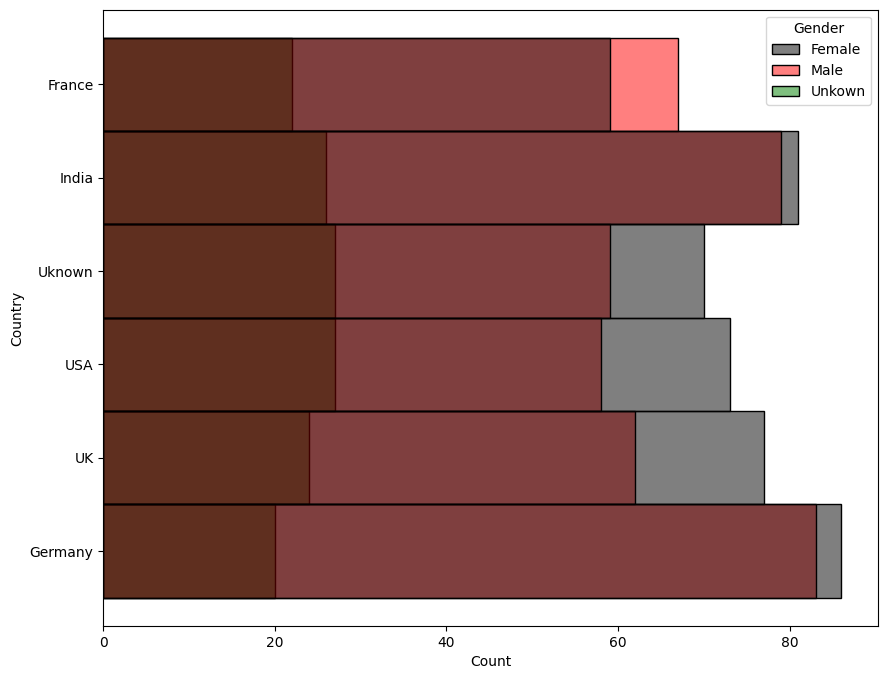

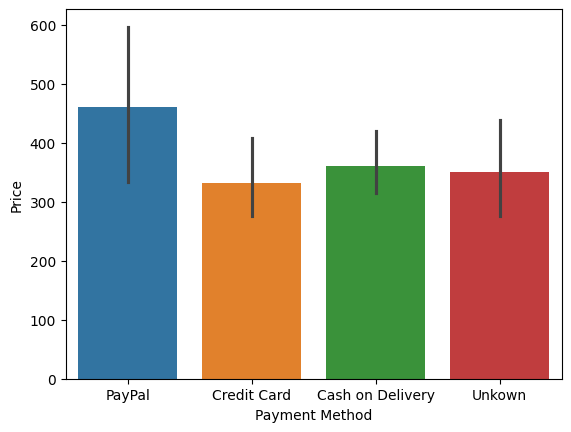

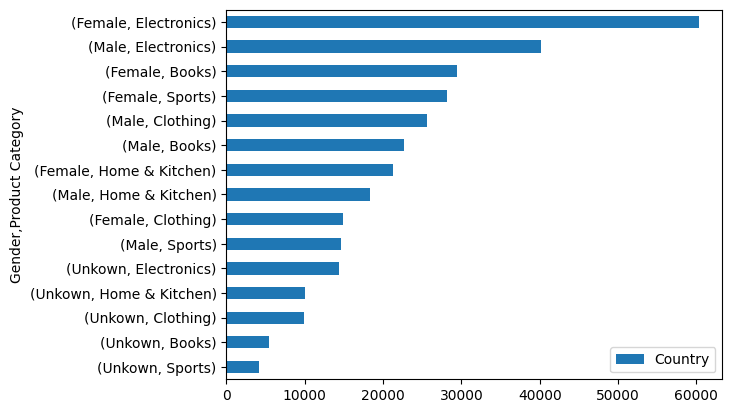

<Axes: >

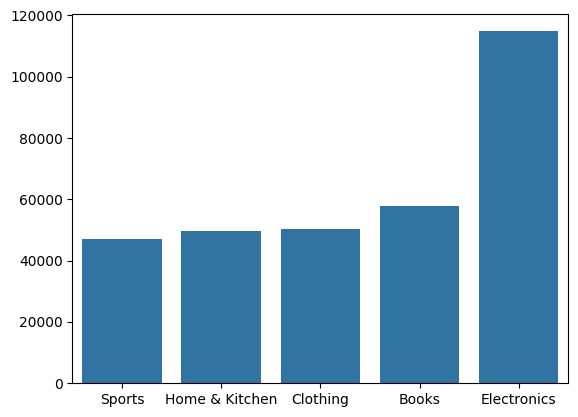

In [206]:
#visulization
plt.figure(figsize=(10,8))
sns.histplot(data=data,y='Country',hue='Gender',palette=['black', 'red', 'green'])
plt.show()
sns.barplot(data=data,x='Payment Method',y='Price',hue='Payment Method')
coun_gen.plot.barh()
gen_pri_cat.plot.barh()
plt.show()
x=pri_cat.index.tolist()
y=pri_cat.values.tolist()
sns.barplot(x=x,y=y)

In [207]:
# inferentak stats
from scipy.stats import ttest_ind,t
# t test indpendent to compare bettwen gender in buy
# first we made it step by step
#h0 = mean-->female = mean-->male
#h1 = mean -->female > mean-->male
male=data['Price'].loc[data['Gender']=='Male']
female=data['Price'].loc[data['Gender']=='Female']
m_male ,s_male ,n_male = male.mean(),male.std(ddof=1),len(male)
m_female ,s_female ,n_female = female.mean(),female.std(ddof=1),len(female)
mean_dif = m_female - m_male
df = n_male + n_female - 2
SE = np.sqrt((s_male**2) / n_male + (s_female**2) / n_female)
t_critical = t.ppf(.5+.95/2,df)
t_value = mean_dif/SE
p_value = 1-(t.cdf(t_value,df))
print(f't_vlaue = {t_value} , t_critical = {t_critical}\n p_value = {p_value} ')

# by function one side
ttest_ind(female,male,alternative='greater')
# finally  te result tee us is no differnce bettwen them that mean we don't have evidece to reject h0

t_vlaue = 0.8248766658541541 , t_critical = 1.9627522328330007
 p_value = 0.2048362475053731 


TtestResult(statistic=np.float64(0.8221215288548439), pvalue=np.float64(0.20561887125728112), df=np.float64(852.0))

In [208]:
# two side
t_critical = t.ppf(.5+.95/2,df)
t_value = mean_dif/SE
p_value = 2*(t.cdf(t_value,df))
print(f't_vlaue = {t_value} , t_critical = {t_critical}\n p_value = {p_value} ')

# by function
ttest_ind(female,male)

t_vlaue = 0.8248766658541541 , t_critical = 1.9627522328330007
 p_value = 1.5903275049892538 


TtestResult(statistic=np.float64(0.8221215288548439), pvalue=np.float64(0.41123774251456224), df=np.float64(852.0))

Gender
Female    446
Male      408
Name: count, dtype: int64
Product Category
Electronics       247
Books             134
Clothing          127
Sports            117
Home & Kitchen    106
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

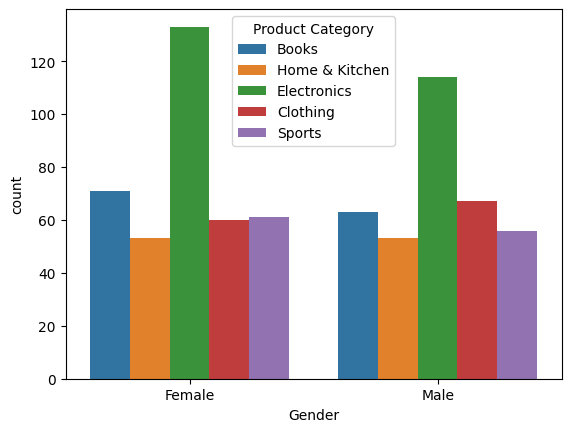

In [209]:
# chi test test to Gender with product category
from scipy.stats import chi2_contingency
data2=data.loc[(data['Gender']=='Male') | (data['Gender']=='Female')]
print(data2['Gender'].value_counts())
print(data2['Product Category'].value_counts())
sns.countplot(data=data2,x='Gender',hue='Product Category')


In [210]:
cont = pd.crosstab(data2['Gender'],data2['Product Category'])
chi2_contingency(cont)

Chi2ContingencyResult(statistic=np.float64(1.6856307767478014), pvalue=np.float64(0.7933261276740331), dof=4, expected_freq=array([[ 69.29138167,  65.67168263, 127.72366621,  54.8125855 ,
         60.50068399],
       [ 64.70861833,  61.32831737, 119.27633379,  51.1874145 ,
         56.49931601]]))

In [211]:
print(cont)

Product Category  Books  Clothing  Electronics  Home & Kitchen  Sports
Gender                                                                
Female               71        60          133              53      61
Male                 63        67          114              53      56


In [212]:
134+127+247+106+117

731

In [213]:
((71+60+133+53+61)*(71+63))/731 # here we get first expected value it equal expc in chi test

69.29138166894664